In [1]:
import warnings
warnings.filterwarnings('ignore')   # to avoid warnings

import numpy as np
import pandas as pd
import seaborn as sns
import scipy.stats as stats
from scipy.stats import skew
from statsmodels.stats.proportion import proportions_ztest # For proportion Z-test
from statsmodels.formula.api import ols      # For n-way ANOVA
from statsmodels.stats.anova import anova_lm # For n-way ANOVA
from   scipy.stats import chi2_contingency   # For Chi-Sq 
import matplotlib.pyplot as plt

sns.set(style="darkgrid")

### <p style="color:green">Source: PGP UT-DSBA Business Statistics Project</p>

- Objective:

1) Statistical Analysis in Python.</br>

2) Descriptive and Inferential statistics.</br>

3) Business Insights.</br>

### <p style="color:green">Data description (source: PGP UT-DSBA)</p>

1.	Age - This is an integer indicating the age of the primary beneficiary (excluding those above 64 years, since they are generally covered by the government).
2.	Sex - This is the policy holder's gender, either male or female.
3.	BMI - This is the body mass index (BMI), which provides a sense of how over or under-weight a person is relative to their height. BMI is equal to weight (in kilograms) divided by height (in meters) squared. An ideal BMI is within the range of 18.5 to 24.9.
4.	Children - This is an integer indicating the number of children / dependents covered by the insurance plan.
5.	Smoker - This is yes or no depending on whether the insured regularly smokes tobacco.
6.	Region - This is the beneficiary's place of residence in the U.S., divided into four geographic regions - northeast, southeast, southwest, or northwest.
7.	Charges - Individual medical costs billed to health insurance

### <p style="color:blue">1) Explore the dataset and extract insights using Exploratory Data Analysis.</p>

#### <p style="color:black">Univariate Analysis</p>

In [2]:
data = pd.read_csv("./AxisInsurance.csv")
data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [4]:
data.drop_duplicates()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [5]:
# Sex, smoke and region are categorical variables
data["sex"] = data["sex"].astype('category')
data["smoker"] = data["smoker"].astype('category')
data["region"] = data["region"].astype('category')

##### <span style="color:red"> Comment: </span>

- It is important to assign each categorical variable as a categorical type.

In [6]:
# .describe() give us all the statistical information for numerical features
data.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


##### <span style="color:red"> Comment: </span>

Numerical:

- age: Average age is 39.20 years old, max age is 64 and min age is 18, and std is 14.04;

- bmi: Average bmi is 30.66 above the ideal range between 18.5 and 24.9, min is 15.96, max is 53.13 (super high), and std is 6.09;

- children: Average children (count) 1.09, min is 0.0, max is 5.0, and std is 1.20;

- charges: Average charges 13270.42, min is 1121.87, max is 63770.42, and std is 12110.01;

Categorical:

- sex: male and female;
- smoker: yes or no;
- regions: northeast, southeast, southwest, or northwest;

In [7]:
# It checks the values that are NaN, in this case there are none.
data.isna().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [8]:
# This is just to visualize the quantities of unique values in each feature;
uniques = {}
for col in data:
    uniques[data[col].name] = data[col].nunique()

unique_values = pd.DataFrame.from_dict(uniques, orient='index')
unique_values.columns = ['count']
unique_values

,count
age,47
sex,2
bmi,548
children,6
smoker,2
region,4
charges,1337


In [9]:
#list for graphs
list_numerical = ['age', 'bmi', 'children', 'charges']

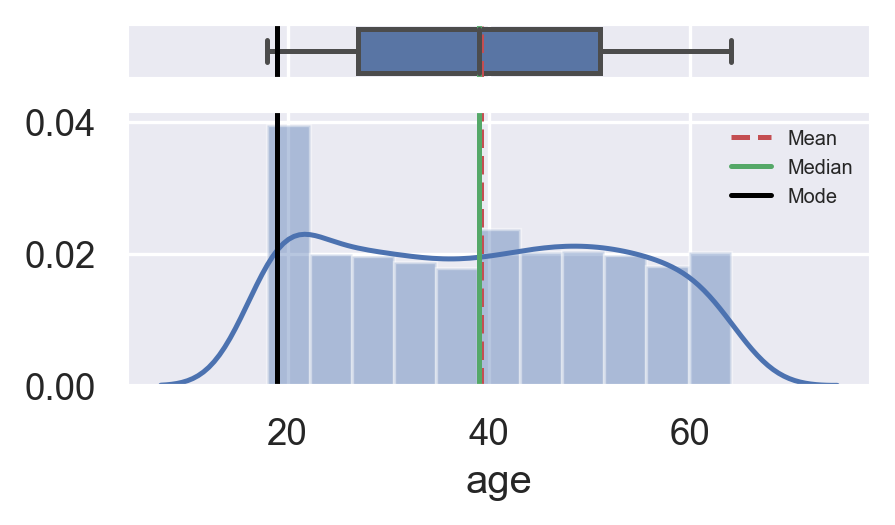

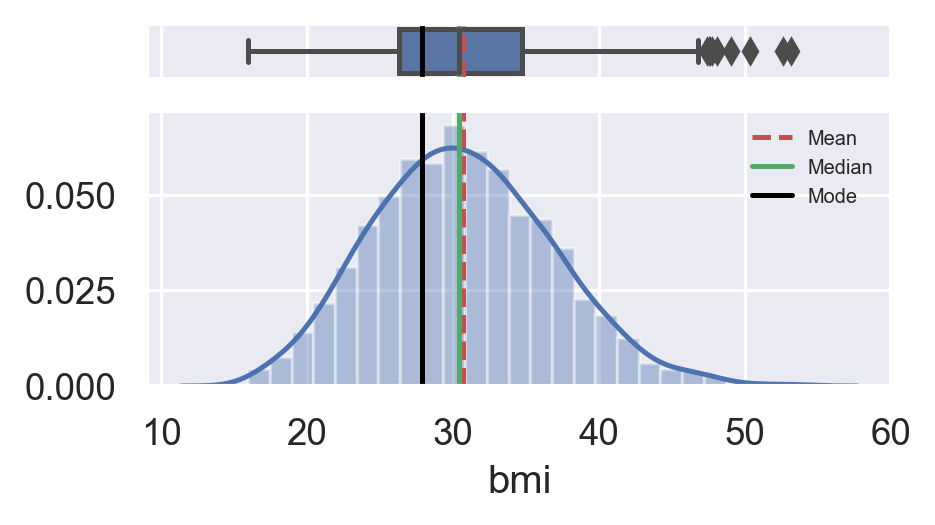

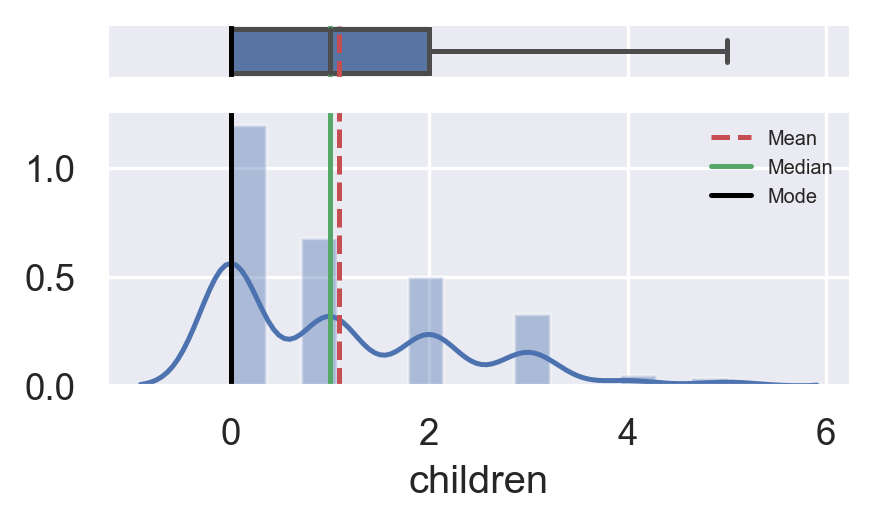

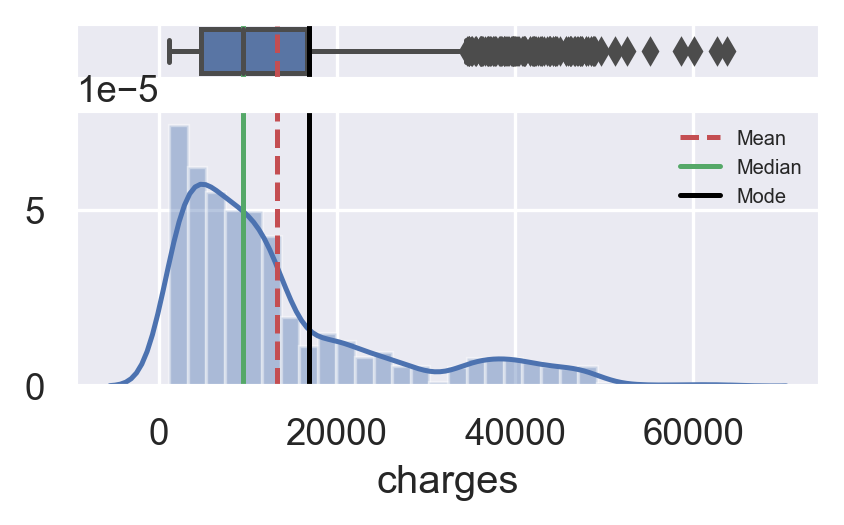

In [10]:
for i in list_numerical:
    f, (ax_box, ax_hist) = plt.subplots(2, sharex=True, gridspec_kw= {"height_ratios": (0.05, 0.25)},figsize=(4, 2))
    mean=data[i].mean()
    median=data[i].median()
    mode=data[i].tolist()[0]

    sns.boxplot(data[i], ax=ax_box)
    ax_box.axvline(mean, color='r', linestyle='--')
    ax_box.axvline(median, color='g', linestyle='-')
    ax_box.axvline(mode, color='black', linestyle='-')

    sns.distplot(data[i], ax=ax_hist)
    ax_hist.axvline(mean, color='r', linestyle='--')
    ax_hist.axvline(median, color='g', linestyle='-')
    ax_hist.axvline(mode, color='black', linestyle='-')
    ax_box.set(xlabel='')
    plt.legend({'Mean':mean,'Median':median,'Mode':mode},prop={'size': 6})
    plt.show()

In [11]:
for i in list_numerical: 
    print('Skewness for {} is: {}'.format(i, skew(data[i])))


Skewness for age is: 0.055610083072599126
Skewness for bmi is: 0.28372857291709386
Skewness for children is: 0.9373281163874423
Skewness for charges is: 1.5141797118745743


##### <span style="color:red"> Comment: </span>

- We can see that all of our numerical variables have a positive "skewness", which means that the "average" is greater than the "median".
- We can also see a large number of outliers in the "charges" and "bmi" features.

#### <p style="color:black">Bivariate Analysis</p>

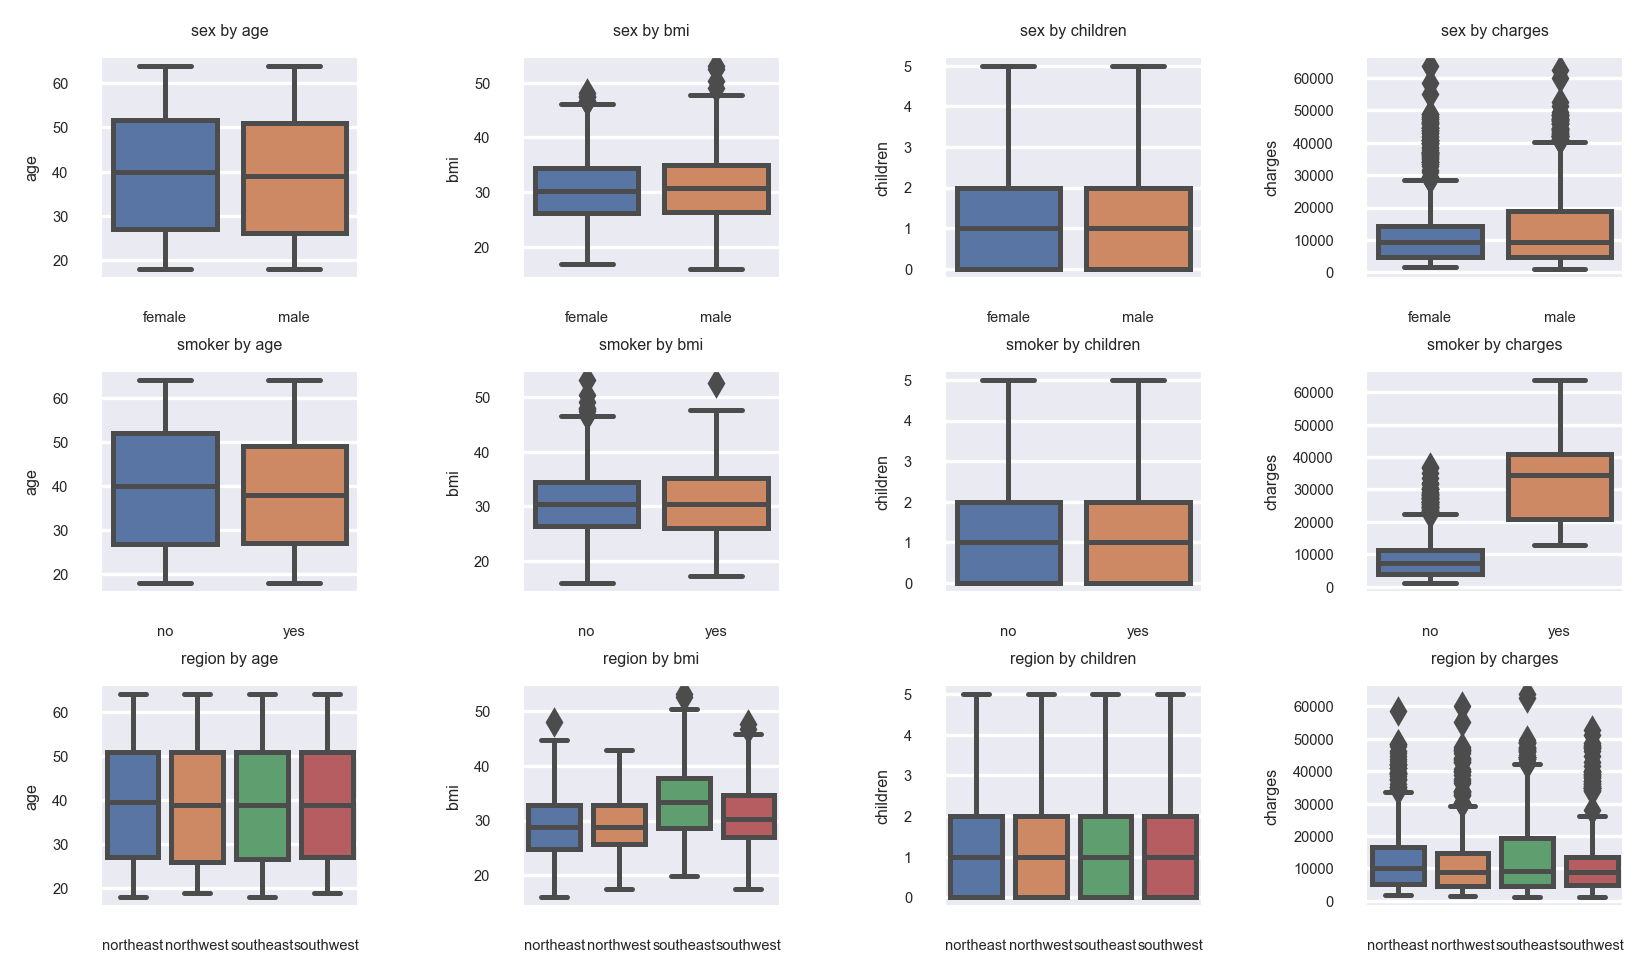

In [12]:
list_numerical = ['age', 'bmi', 'children', 'charges']
list_categorical = ['sex', 'smoker', 'region']


counter_i = 0
counter_j = 0

sns.set(font_scale = 0.4)
f, ax_box = plt.subplots(3,4)
plt.subplots_adjust(hspace=4, wspace=10)
for i in list_categorical:
    for j in list_numerical:
        ax = sns.boxplot(x=i, y=j, data=data, ax=ax_box[counter_i, counter_j]).set(title= i + ' by ' + j, xlabel=None)
        counter_j = counter_j + 1  
    counter_j = 0    
    counter_i = counter_i + 1
    
    
plt.tight_layout()

##### <span style="color:red"> Comment: </span>

Categorical sex:

- sex by age: age is similar between male and female.
- sex by bmi: we can see a higher average BMI among men and a greater number of outliers, compared to women.
- sex by children: children is similar between male and female.

<span style="color:red">- sex by charges: we can see a greater number of outliers for charges in women than in men. (graph 1)</span>

Categorical smoker:

- smoker by age: nonsmokers has a slightly higher average age than smokers.
- smoker by bmi: higher number of outliers for bmi in nonsmoke; however, the average for smokers and nonsmokers is almost the same level.
- smoker by children: the profile of smokers and nonsmokers who have children is similar.

<span style="color:red">- smoker by charges: smokers have higher charges than nonsmokers. (graph 2)</span>

Categorical region:

- region by age: age pattern is similar between different regions.

<span style="color:red">- region by bmi: southeast has the higher level of bmi. Average and absolute. (graph 3)</span>

- region by children: children pattern is similar between different regions.

<span style="color:red">- region by charges: southeast seems to be the most skewed data with the highest value for charges. (graph 4)</span>

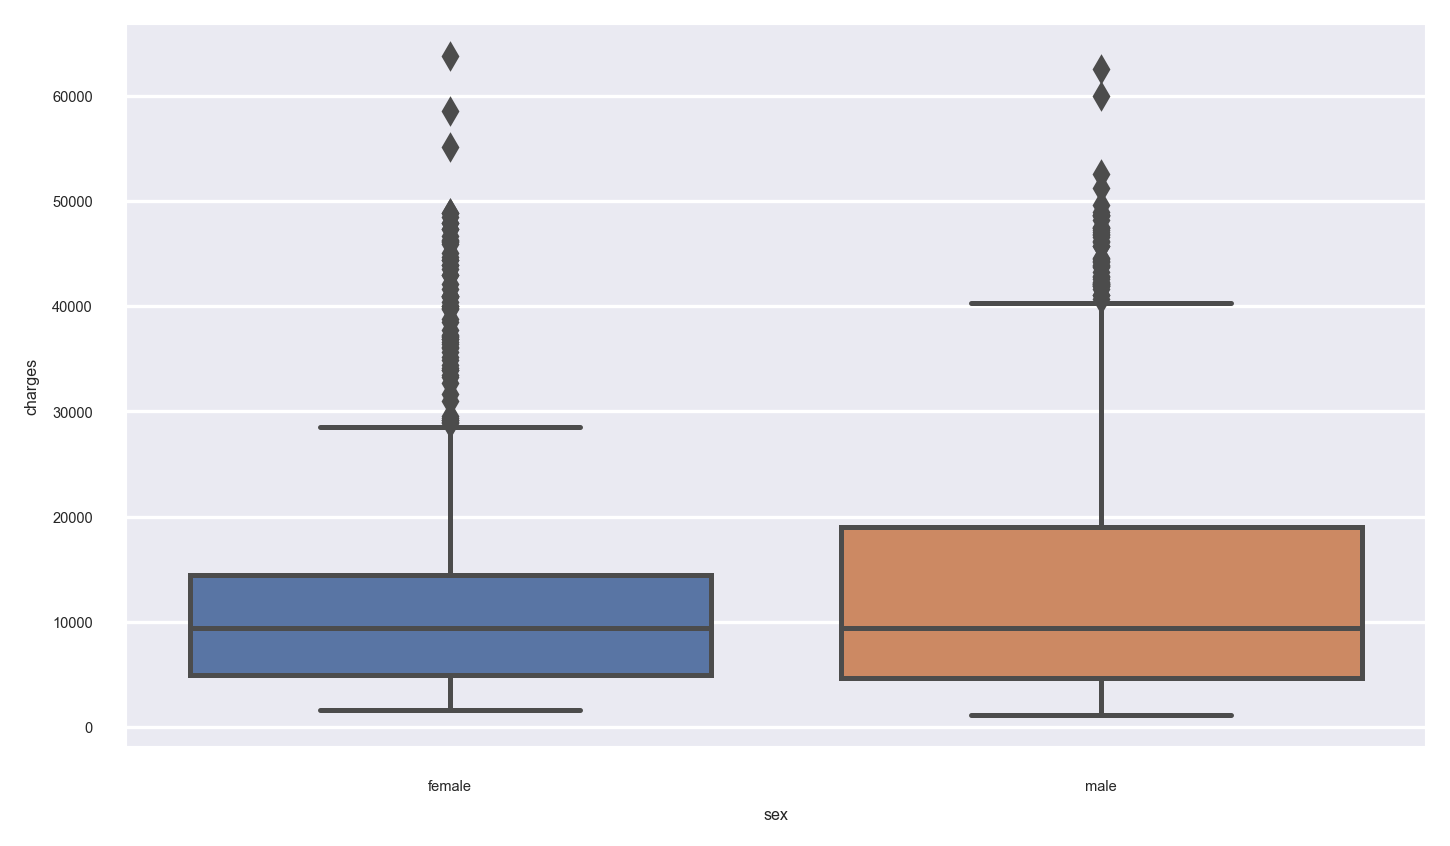

In [13]:
# (graph 1) sex by charges: we can see a higher number the outliers for
# charges in females than in males.
sns_plot = sns.boxplot(x='sex', y='charges', data=data)

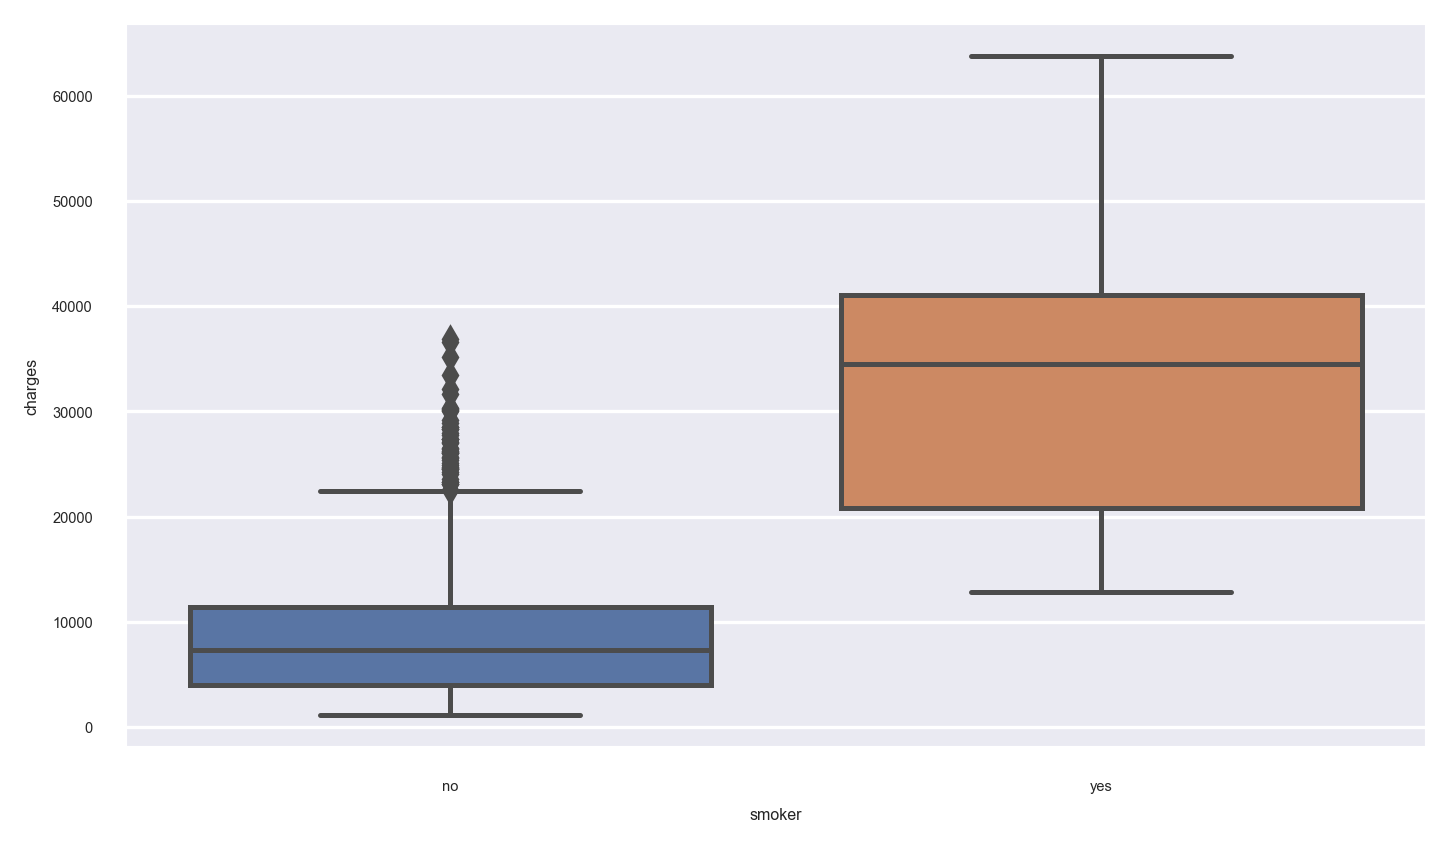

In [14]:
# (graph 2) smoker by charges: smokers spend more money than nonsmokers -
# AS we will test the hypothesis later on.
sns_plot = sns.boxplot(x='smoker', y='charges', data=data)

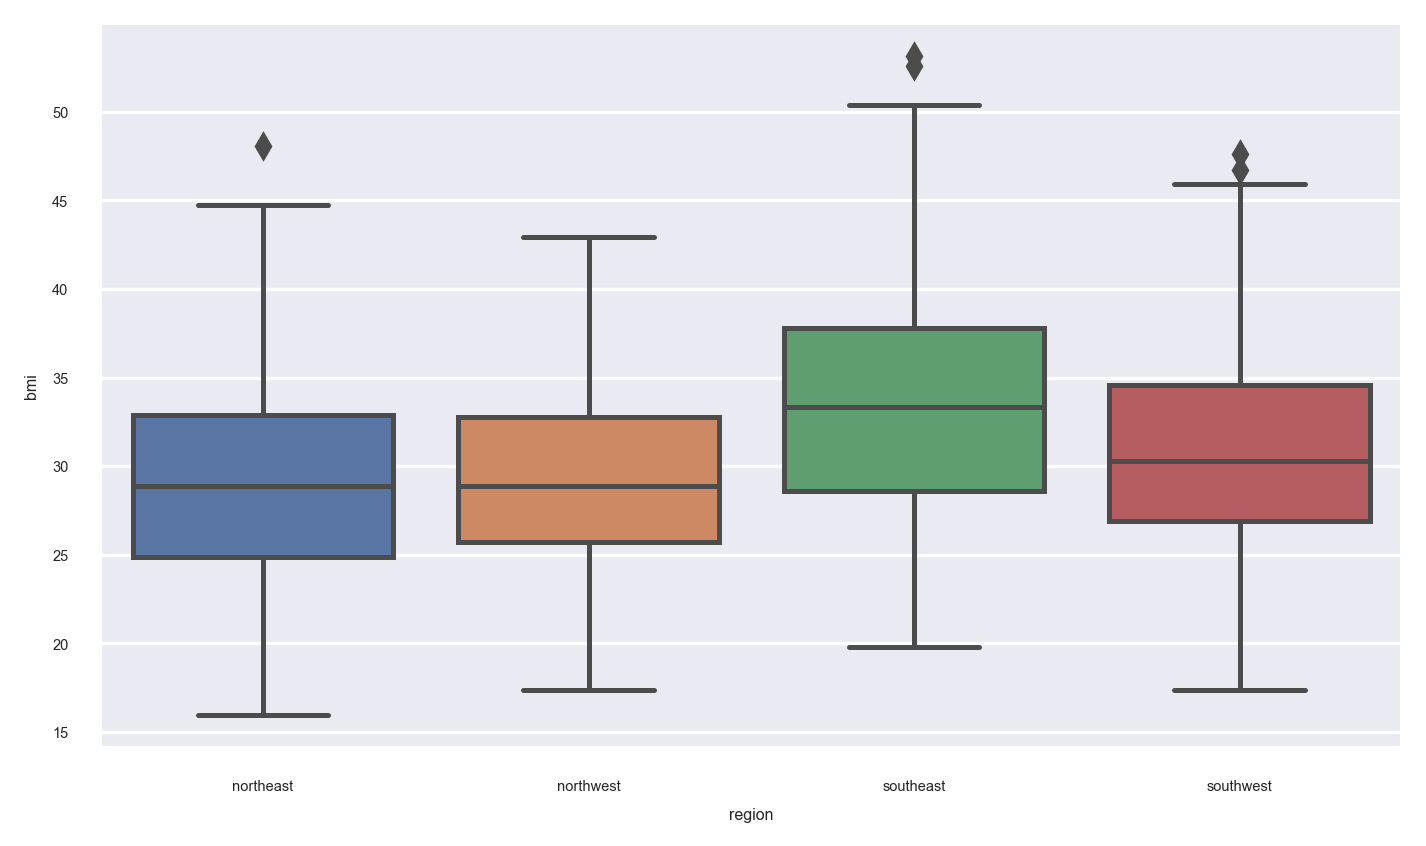

In [15]:
# (graph 3) region by bmi: southeast has the higher level of bmi.
sns_plot = sns.boxplot(x='region', y='bmi', data=data)

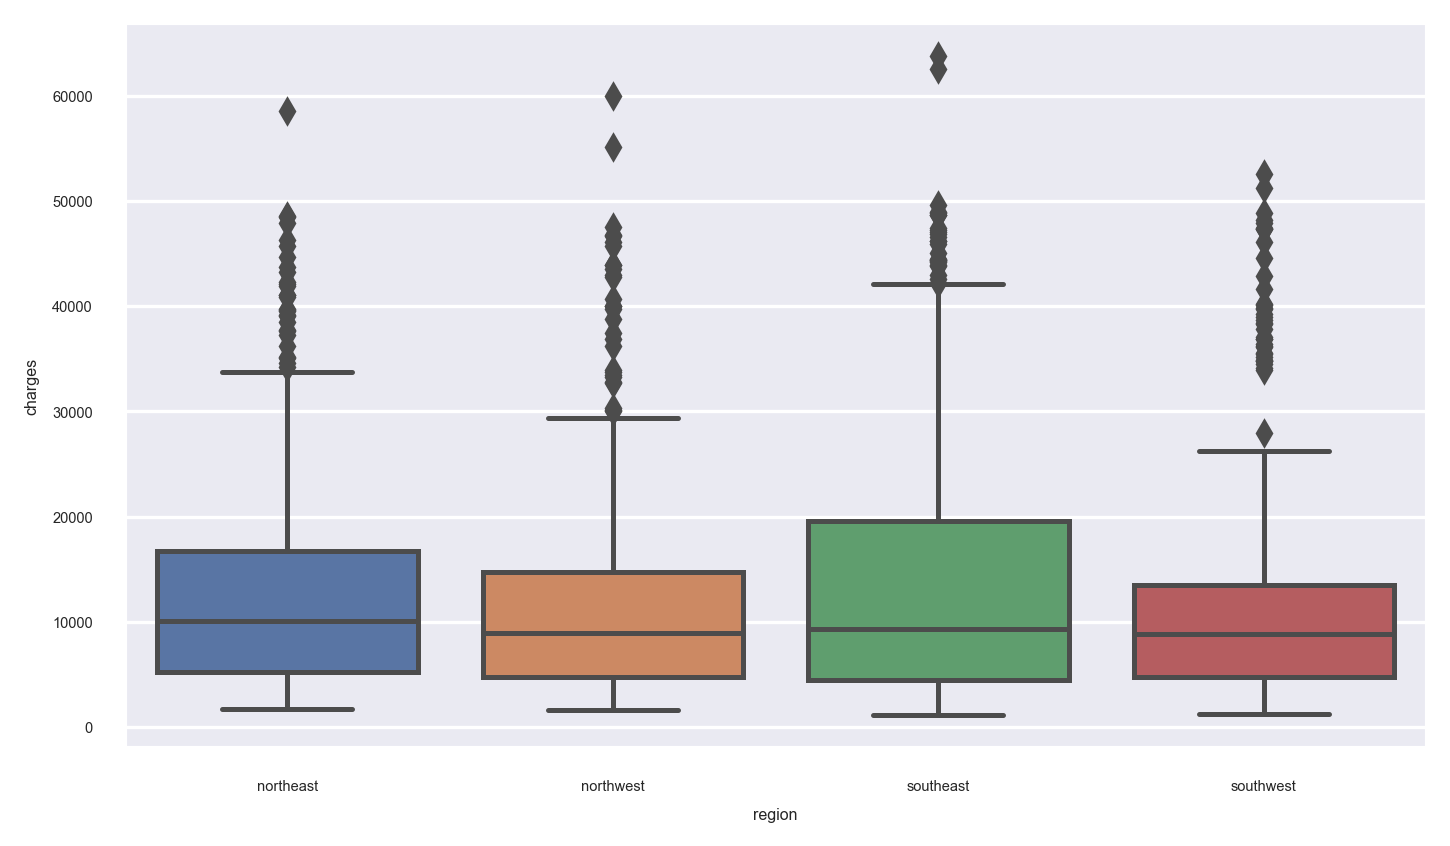

In [16]:
# (graph 4) region by charges: southeast seems to be the most skewed data
# with the highest value for charges.
sns_plot = sns.boxplot(x='region', y='charges', data=data)

#### <p style="color:black">Multivariate Analysis</p>

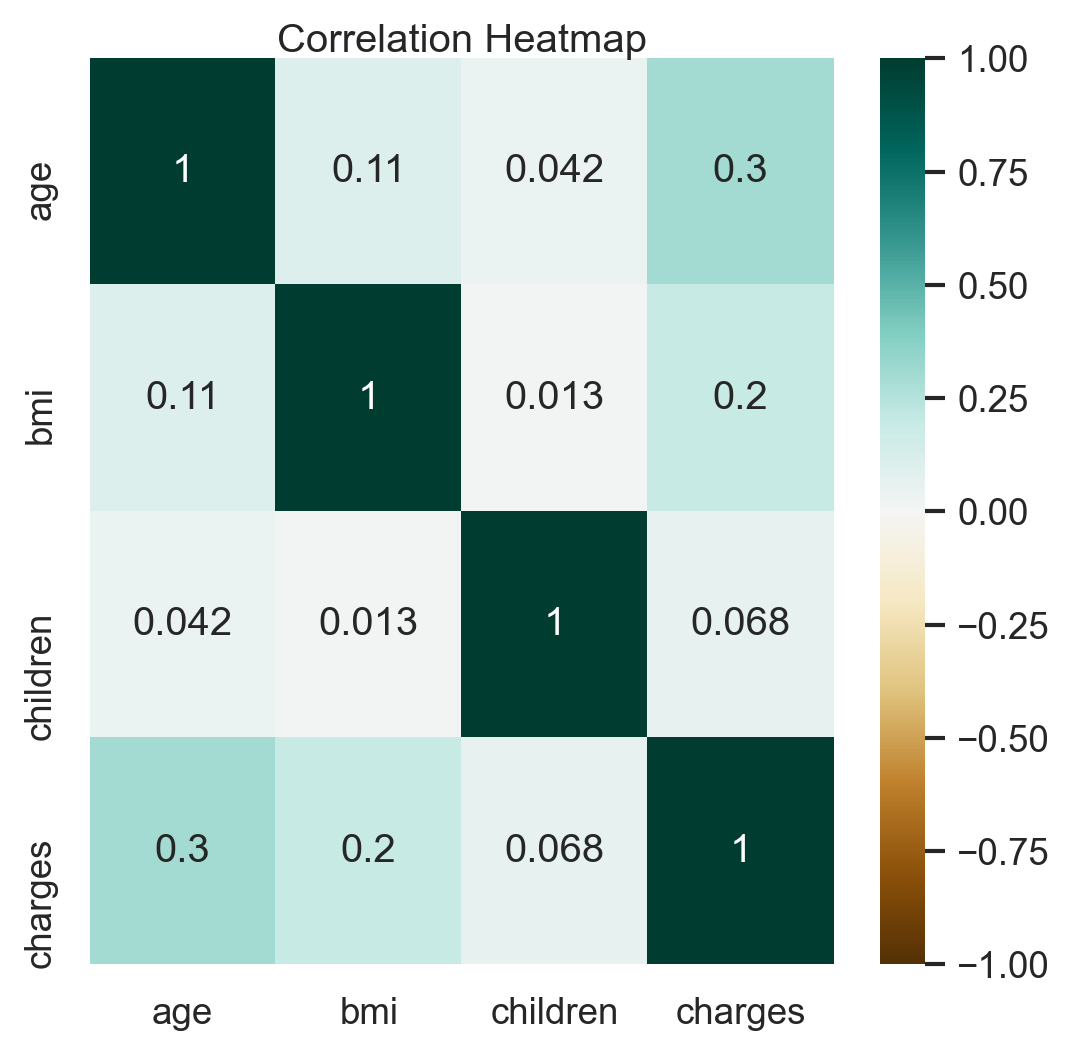

In [17]:
plt.figure(figsize=(5,5))

sns.set(font_scale =1)
# A better color to see the positive or negative correlation of each variable
heatmap = sns.heatmap(data.corr(), vmin=-1, vmax=1, annot=True, cmap='BrBG')
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':12}, pad=2);

##### <span style="color:red"> Comment: </span>

Correlation (no negative correlations):

- age and changes: have the highest correlation among our features.
- bmi and charges: have the second highest correlation among our features.

### <p style="color:blue">2) Prove (or disprove) that the medical claims made by the people who smoke is greater than those who don't?</p>

#### Step 1: Define null and alternative hypotheses;

* H<sub>0</sub>: μ1 <= μ2 The average charges of smokers is smaller or equal than nonsmokers </br>

* H<sub>a</sub>: μ1 > μ2 The average charges of smokers is greater than nonsmokers  </br>

#### Step 2: Decide the significance level;

α = 0.05

#### Step 3: Identify the test;

We don't know the standard deviation of the population, so we should use a t-test two samples.

#### Step 4: Calculate the test-statistics and p-value

In [18]:
data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [19]:
# Isolating the data between smokers and no smokers
smoker_yes = data[data['smoker']=="yes"]
smoker_no = data[data['smoker']=="no"]

# Adjusting the size of the rows to be equal
smoker_no = smoker_no[-274:]

# Isolating the data of charges so we can test them both, charges for smokers vs. charges for no smokers.
charges_yes = smoker_yes['charges']
charges_no = smoker_no['charges']

In [20]:
# Avg of charges for smokers
charges_yes.mean()

32050.23183153285

In [21]:
# Avg of charges for nonsmokers
charges_no.mean()

8441.24905576642

In [22]:
# NOTE: the p-value given is two-sided so the one-sided p value would be p/2
t_statistic, p_value = stats.ttest_ind(charges_yes, charges_no)
print("tstats for 2 sample independent = ",t_statistic, ", p_value_onetail =", p_value/2, ", p_value_twotail =", p_value)

tstats for 2 sample independent =  30.168384427571915 , p_value_onetail = 1.080249501584019e-118 , p_value_twotail = 2.160499003168038e-118


In [23]:
if (p_value < 0.05):
    print('We should Reject Null Hypothesis H0')
else:
    print('We should Fail to reject Null Hypothesis H0')

We should Reject Null Hypothesis H0


#### <span style="color:red">Step 5:  Decide to reject or accept null hypothesis</span>

This is a one tail test, since P-value is less than 0.05, we reject the null hypothesis and can conclude that people who smoke have an average larger medical claim. Furthermore, when we compare the result of our bivariate analysis between smokers and charges with the result of our p_value, we come to a similar conclusion graphically.

### <p style="color:blue">3) Prove (or disprove) with statistical evidence that the BMI of females is different from that of males.</p>

#### Step 1: Define null and alternative hypotheses;


* H<sub>0</sub>: x&#772;<sub>1</sub> = x&#772;<sub>2</sub>, There is no difference between the males BMI and female BMI means.
* H<sub>A</sub>: x&#772;<sub>1</sub> != x&#772;<sub>2</sub>, There is difference between the males BMI and female BMI means.

#### Step 2: Decide the significance level;


α = 0.05

#### Step 3: Identify the test;


We don't know the standard deviation of the populations, so we should use a t-test two-sample.

#### Step 4: Calculate the test-statistics and p-value

In [24]:
# Isolating male and female in the data
data_male = data[data['sex']=='male']
data_female = data[data['sex']=='female']

# In the isolated data we search the bmi feature
data_male_bmi = data_male['bmi']
data_female_bmi = data_female['bmi']

In [25]:
# NOTE: the p-value given is two-sided so the one-sided p value would be p/2
t_statistic, p_value = stats.ttest_ind(data_male_bmi, data_female_bmi)
print("tstats = ",t_statistic, ", p_value_twotail = ", p_value)

tstats =  1.696752635752224 , p_value_twotail =  0.08997637178984932


In [26]:
if (p_value < 0.05):
    print('We should Reject Null Hypothesis H0')
else:
    print('We should Fail to reject Null Hypothesis H0')

We should Fail to reject Null Hypothesis H0


#### <span style="color:red">Step 5:  Decide to reject or accept null hypothesis</span>

This is a two tailed test. As the P value (0.089) > 0.05 (confidence level) we fail to reject the null hypothesis and we can conclude that there is no a difference in the two averages.

### <p style="color:blue">4) Is the proportion of smokers significantly different across different regions?</p>

#### Step 1: Define null and alternative hypotheses;

* H<sub>0</sub>: Smokers proportions are independent across different regions

* H<sub>1</sub>: Smokers proportions are dependent across different regions

#### Step 2: Decide the significance level;
α = 0.05

In [27]:
data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


#### Step 3: Identify the test;
We will use two different categorical variables, smoker and region. I am planning to convert smoker into numeric variable so that I can use the raw frequencies of "yes" equal to 1 and "no" equal to zero in a contingency table. This is a Chi-sq Test where categorical data has been reported in raw frequencies.

#### Step 4: Calculate the test-statistics and p-value

In [28]:
# Transforming "yes" and "no" into categorical values "1" and "0"
data['smoker_num'] = data['smoker'].cat.codes

In [29]:
data.head()

,age,sex,bmi,children,smoker,region,charges,smoker_num
0,19,female,27.900,0,yes,southwest,16884.92400,1
1,18,male,33.770,1,no,southeast,1725.55230,0
2,28,male,33.000,3,no,southeast,4449.46200,0
3,33,male,22.705,0,no,northwest,21984.47061,0
4,32,male,28.880,0,no,northwest,3866.85520,0


In [30]:
# Counting the number smokers and no smokers per region
total_count_per_region = data.groupby('region')['smoker_num'].count()
total_count_per_region

region
northeast    324
northwest    325
southeast    364
southwest    325
Name: smoker_num, dtype: int64

In [31]:
# Counting the number of smokers per region, using sum I'll be able to know
# what are the smokers since the smokers has a value in the
# smoker_num column equal to 1
total_smokers_per_region = data.groupby('region')['smoker_num'].sum()
total_smokers_per_region

region
northeast    67
northwest    58
southeast    91
southwest    58
Name: smoker_num, dtype: int8

In [32]:
total_NO_smokers_per_region = total_count_per_region - total_smokers_per_region
total_NO_smokers_per_region

region
northeast    257
northwest    267
southeast    273
southwest    267
Name: smoker_num, dtype: int64

In [33]:
df_cont = pd.DataFrame({'Smoker_yes': total_smokers_per_region,
                        'Smoker_no': total_NO_smokers_per_region},
                        index = ['southwest', 'southeast', 'northwest',\
                                 'northeast'])
df_cont

,Smoker_yes,Smoker_no
southwest,58,267
southeast,91,273
northwest,58,267
northeast,67,257


In [34]:
# Using the chi2_contingency test in python
chi2, pval, dof, exp_freq = chi2_contingency(df_cont, correction = False)
pval

0.06171954839170541

Source "Substring of the function chi2_contingency":

This function computes the chi-square statistic and p-value for the
hypothesis test of independence of the observed frequencies in the
contingency table [1]_ `observed`.  The expected frequencies are computed
based on the marginal sums under the assumption of independence; see
`scipy.stats.contingency.expected_freq`.  The number of degrees of
freedom is (expressed using numpy functions and attributes):

dof = observed.size - sum(observed.shape) + observed.ndim - 1

In [35]:
if (p_value < 0.05):
    print('We should Reject Null Hypothesis H0')
else:
    print('We should Fail to reject Null Hypothesis H0')

We should Fail to reject Null Hypothesis H0


#### <span style="color:red">Step 5:  Decide to reject or accept null hypothesis</span>

Since the p-value is greater than 0.05 <b> (0.06171954839170541) </b>, greater than (alpha), we fail to reject the null hypothesis, which means that smokers proportions are not independent of the region. 

### <p style="color:blue">5) Is the mean BMI of women with no children, one child, and two children the same? Explain your answer with statistical evidence.</p>

#### Step 1: Define null and alternative hypotheses;


* H<sub>0</sub>: The means of BMI with respect to women with no children, one child, and two children is equal.
* H<sub>1</sub>: At least one of the mean of BMI with respect to women with no children, one child, and two children is unequal.

#### Step 2: Decide the significance level;

α = 0.05

#### Step 3: Identify the test;
One-way ANOVA - Equality of population through variances of samples.

#### Step 4: Calculate the test-statistics and p-value

In [36]:
data.head()

,age,sex,bmi,children,smoker,region,charges,smoker_num
0,19,female,27.900,0,yes,southwest,16884.92400,1
1,18,male,33.770,1,no,southeast,1725.55230,0
2,28,male,33.000,3,no,southeast,4449.46200,0
3,33,male,22.705,0,no,northwest,21984.47061,0
4,32,male,28.880,0,no,northwest,3866.85520,0


In [37]:
# Isolating female part of the data
data_female = data[data['sex']=='female']
data_female.head()

,age,sex,bmi,children,smoker,region,charges,smoker_num
0,19,female,27.90,0,yes,southwest,16884.92400,1
5,31,female,25.74,0,no,southeast,3756.62160,0
6,46,female,33.44,1,no,southeast,8240.58960,0
7,37,female,27.74,3,no,northwest,7281.50560,0
9,60,female,25.84,0,no,northwest,28923.13692,0


In [38]:
# Filtering data of only women with 0, 1 and 2 children
data_female_filtered = data_female[data_female['children']<=2]
data_female_filtered.head()

,age,sex,bmi,children,smoker,region,charges,smoker_num
0,19,female,27.90,0,yes,southwest,16884.92400,1
5,31,female,25.74,0,no,southeast,3756.62160,0
6,46,female,33.44,1,no,southeast,8240.58960,0
9,60,female,25.84,0,no,northwest,28923.13692,0
11,62,female,26.29,0,yes,southeast,27808.72510,1


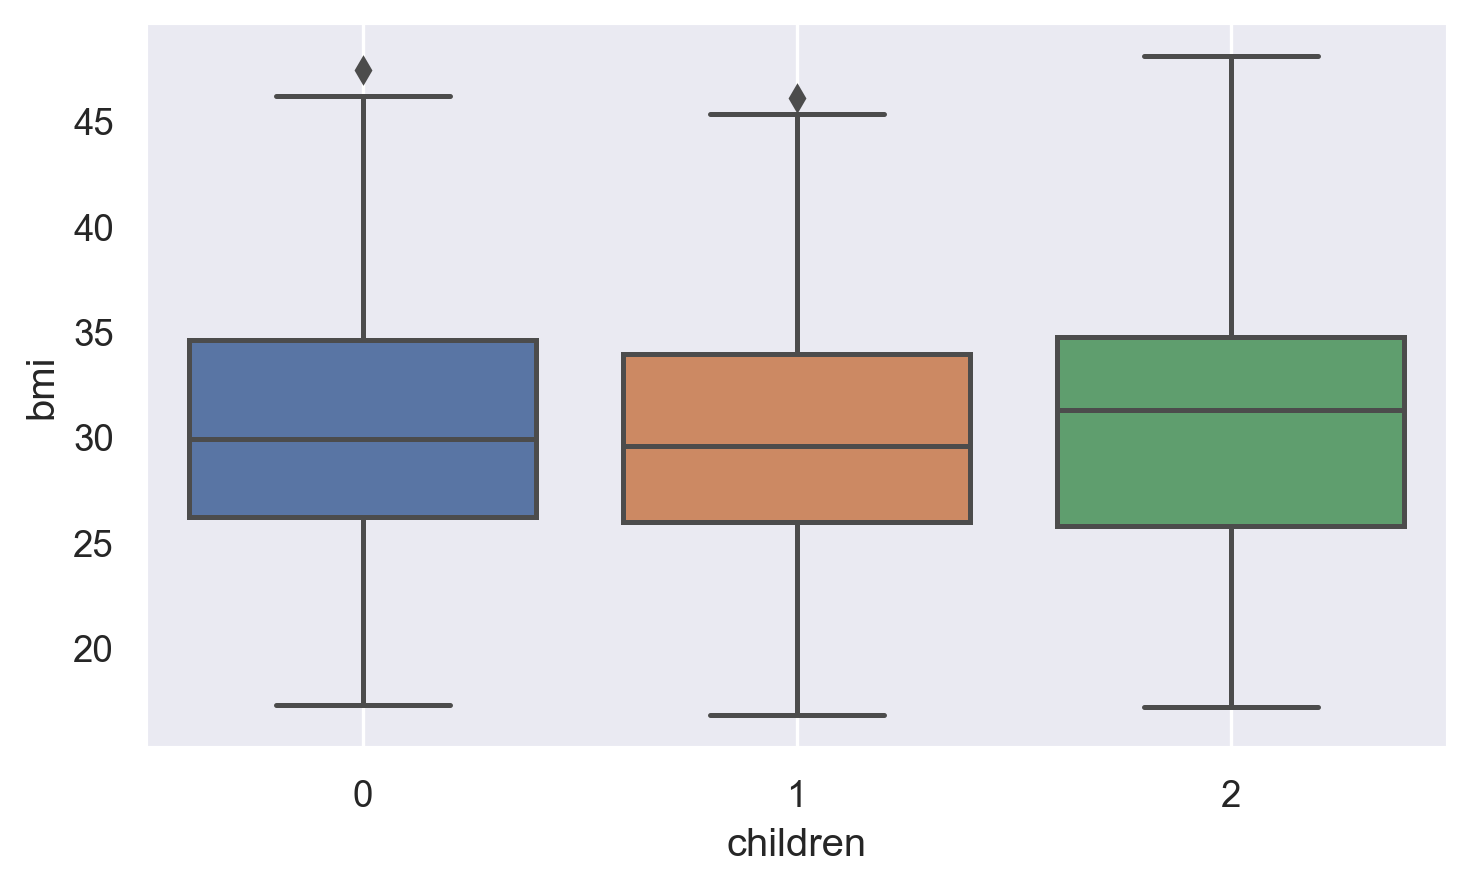

In [39]:
# Women BMI with children 0, 1, 2;
sns.boxplot(x="children", y="bmi", data=data_female_filtered)
plt.grid()
plt.show()

##### <span style="color:red"> Comment: </span>

Here we can see that there is not much difference between BMI for women with 0, 1 or 2 children.

In [40]:
# Applying ANOVA and cheking each children count (0,1,2) with the bmi;
formula = 'bmi ~ C(children)'
model = ols(formula, data_female_filtered).fit()
aov_table = anova_lm(model)
print(aov_table)

                df        sum_sq    mean_sq         F    PR(>F)
C(children)    2.0     24.590123  12.295062  0.334472  0.715858
Residual     563.0  20695.661583  36.759612       NaN       NaN


In [41]:
if (p_value < 0.05):
    print('We should Reject Null Hypothesis H0')
else:
    print('We should Fail to reject Null Hypothesis H0')

We should Fail to reject Null Hypothesis H0


#### <span style="color:red">Step 5:  Decide to reject or accept null hypothesis</span>

We fail to reject the null hypothesis which states that the means of BMI with respect to women with no children, one child, and two children is equal, p_value (> 0.05)

### <p style="color:green"> A second approach for the test above:</p>

### <p style="color:blue">5.b.) Is the mean BMI of women with no children, one child, and two children the same? Explain your answer with statistical evidence.</p>

#### Step 1: Define null and alternative hypotheses;

* $H_0$: $\mu1$ = $\mu2$ = $\mu3$
* $H_A$: At least one $\mu$ differs 

Here $\mu1$, $\mu2$ and $\mu3$ are the mean BMI applied to women with 0, 1 and 2 children.

#### Step 2: Decide the significance level;

α = 0.05

#### Step 3: Identify the test;
One-way ANOVA - Equality of population through variances of samples.

#### Step 4: Calculate the test-statistics and p-value

In [42]:
data.head()

,age,sex,bmi,children,smoker,region,charges,smoker_num
0,19,female,27.900,0,yes,southwest,16884.92400,1
1,18,male,33.770,1,no,southeast,1725.55230,0
2,28,male,33.000,3,no,southeast,4449.46200,0
3,33,male,22.705,0,no,northwest,21984.47061,0
4,32,male,28.880,0,no,northwest,3866.85520,0


In [43]:
# Isolating female in the data
data_female = data[data['sex']=='female']

# Isolating the number of children in the data
data_female_0 = data_female[data_female['children']==0]
data_female_1 = data_female[data_female['children']==1]
data_female_2 = data_female[data_female['children']==2]

In [44]:
# Three different bmi array
df_fem_0 = np.array(data_female_0['bmi'])
df_fem_1 = np.array(data_female_1['bmi'])
df_fem_2 = np.array(data_female_2['bmi'])

In [45]:
# Building up our dataFrame to make sure it fits the purpose of the function we are going to pass in.
mean_df = pd.DataFrame()

df1 = pd.DataFrame({'children': 0, 'Mean_BMI': df_fem_0})
df2 = pd.DataFrame({'children': 1, 'Mean_BMI': df_fem_1})
df3 = pd.DataFrame({'children': 2, 'Mean_BMI': df_fem_2})

mean_df = mean_df.append(df1) 
mean_df = mean_df.append(df2) 
mean_df = mean_df.append(df3) 

mean_df

,children,Mean_BMI
0,0,27.900
1,0,25.740
2,0,25.840
3,0,26.290
4,0,39.820
...,...,...
114,2,34.700
115,2,26.315
116,2,40.370
117,2,24.225


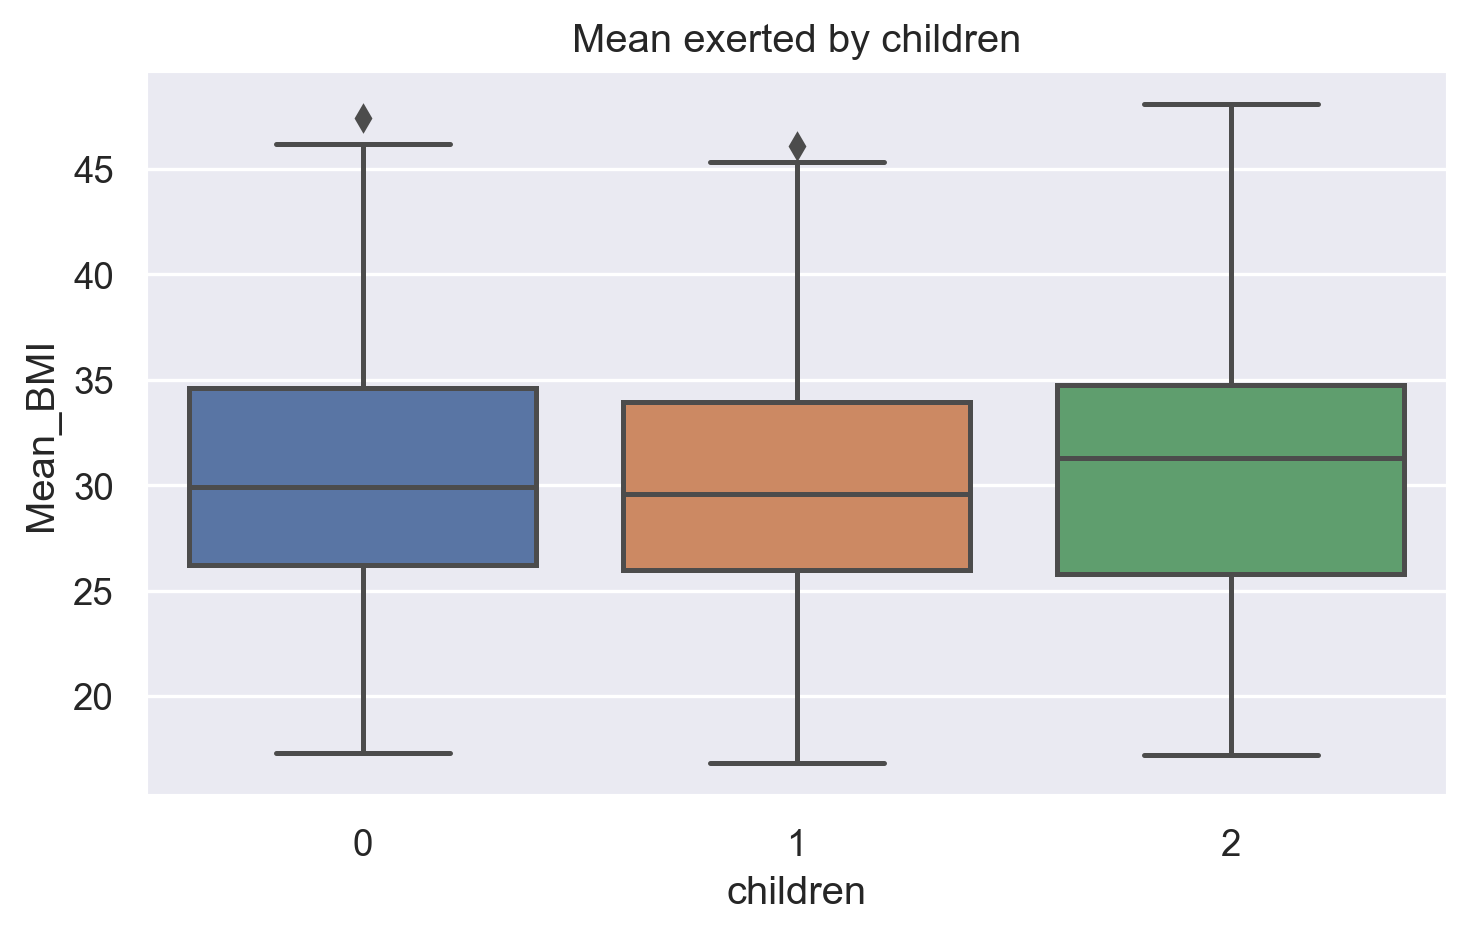

In [46]:
# Using boxplot to compare each children category with the mean BMI
sns.boxplot(x = "children", y = "Mean_BMI", data = mean_df)
plt.title('Mean exerted by children')
plt.show()

##### <span style="color:red"> Comment: </span>

Here we can see that there is not much difference between BMI for women with 0, 1 or 2 children, on average.

In [47]:
import statsmodels.api         as     sm
from   statsmodels.formula.api import ols
 
# ols - ordinary linear square
mod = ols('Mean_BMI ~ C(children)', data = mean_df).fit()
aov_table = sm.stats.anova_lm(mod, typ=2)
print(aov_table)

                   sum_sq     df         F    PR(>F)
C(children)     24.590123    2.0  0.334472  0.715858
Residual     20695.661583  563.0       NaN       NaN


#### <span style="color:red">Step 5:  Decide to reject or accept null hypothesis</span>

We fail to reject that:

The means of BMI with respect to women with no children, one child, and two children is equal. 

p_value (> 0.05) As we saw in the graph above, we fail to reject that each BMI average in relation to women and the number of children they have is equal. Once we got a p_value (> 0.05) that is greater than our alpha.

In [48]:
if (p_value < 0.05):
    print('We should Reject Null Hypothesis H0')
else:
    print('We should Fail to reject Null Hypothesis H0')

We should Fail to reject Null Hypothesis H0
